<a href="https://colab.research.google.com/github/Masakida0514/DaraScienceRepo/blob/main/%E7%A9%BA%E9%96%93%E6%A7%8B%E9%80%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 内容
位置情報($x_1$,$x_2$)と気温$y$のデータの読み込み\
回帰分析（最近傍法、k近傍法(kNN)、Nadayara Watson回帰）\
未知の場所の推論

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.nonparametric.kernel_regression import KernelReg

In [ ]:
# データ取り込み(総務省統計局のデータを少し整理したもの)
df = pd.read_csv("place-temp.csv") 
df.head()

,観測地点,緯度,経度,年平均気温 (℃)
0,札幌,43.06417,141.34694,9.2
1,青森,40.82444,140.74000,10.7
2,盛岡,39.70361,141.15250,10.6
3,仙台,38.26889,140.87194,12.8
4,秋田,39.71861,140.10250,12.1


In [ ]:
df.tail()

,観測地点,緯度,経度,年平均気温 (℃)
42,熊本,32.78972,130.74167,17.2
43,大分,33.23806,131.61250,16.8
44,宮崎,31.91111,131.42389,17.7
45,鹿児島,31.56028,130.55806,18.8
46,那覇,26.21250,127.68111,23.3


In [ ]:
x = df[["緯度", "経度"]].values
y = df["年平均気温 (℃)"].values

Text(0, 0.5, 'latitude')

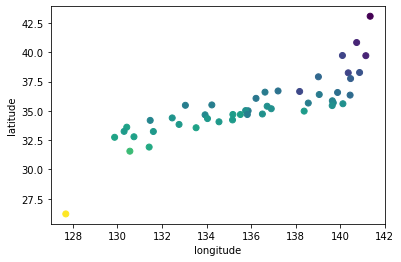

In [ ]:
# データの可視化
plt.scatter(x[:,1],x[:,0], c=y)
plt.xlabel("longitude")
plt.ylabel("latitude")

### 最近傍法

In [ ]:
# 最近傍法のモデル定義
nn = KNeighborsRegressor(n_neighbors=1)

In [ ]:
# 回帰
nn.fit(x,y)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
# 未知地点(早稲田大学)
x_new = np.array([[35.7098407, 139.72313]])

# 予測
y_pred_nn = nn.predict(x_new)
print(y_pred_nn)

[15.8]


### kNN

In [ ]:
# kNNのモデル定義
knn = KNeighborsRegressor(n_neighbors=5)

# 回帰
knn.fit(x,y)

# 予測
y_pred_knn = knn.predict(x_new)
print(y_pred_knn)

[15.58]


In [ ]:
# ガウス過程回帰のモデル
gpr = GaussianProcessRegressor()

# 学習
gpr.fit(x,y)

# 予測
y_pred_gpr = gpr.predict(x_new)
print(y_pred_gpr)

[15.76228013]


### Nadaraya-Watson回帰

In [ ]:
# Nadaraya-Watson回帰モデルの学習
model = KernelReg(exog=x,endog=y,var_type=["c","c"])

# 予測
y_pred_nw = model.fit(x_new)
print(y_pred_nw[0])

[15.59348884]


In [ ]:
# まとめ
print("最近傍法による予測：", y_pred_nn)
print("kNNによる予測：", y_pred_knn)
# print("ガウス過程回帰による予測：", y_pred_gpr)
print("Nadaraya-Watson回帰による予測：", y_pred_nw[0])

最近傍法による予測： [15.8]
kNNによる予測： [15.58]
Nadaraya-Watson回帰による予測： [15.59348884]


### 推論結果の評価

In [ ]:
index = 26 #大阪のデータを回帰から除外し、検証用に使う
x_train = np.delete(x, [index], axis=0) 
y_train = np.delete(y, [index], axis=0)
x_test = x[index].reshape(1,-1)
y_test = y[index]

In [ ]:
# 最近傍法
nn.fit(x_train, y_train)
y_pred_nn = nn.predict(x_test)

# kNN
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

# Nadaraya-Watson回帰
model = KernelReg(exog=x_train, endog=y_train,var_type=["c","c"])
y_pred_nw = model.fit(x_test)

In [ ]:
print("大阪の年平均気温：", y_test)
print("最近傍法による予測：", y_pred_nn)
print("kNNによる予測：", y_pred_knn)
print("Nadaraya-Watson回帰による予測：", y_pred_nw[0])

大阪の年平均気温： 17.1
最近傍法による予測： [15.2]
kNNによる予測： [16.06]
Nadaraya-Watson回帰による予測： [16.18351962]


### (参考まで)ガウス過程回帰の場合

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

# モデル定義
gpr = GaussianProcessRegressor()

# 回帰
gpr.fit(x_train, y_train)

# 予測
y_pred_gpr = gpr.predict(x_test)
print(y_pred_gpr)

[16.30574763]
